# Bokeh Plotting Interface Demonstration

***


### Welcome! This notebook demonstrates how to use all the functions associated with ARCTIC's Bokeh plotting interface, and gives a brief overview of its intended usage.


Before you continue this tutorial, we would highly recommend working through the [HDF5 Tutorial](https://github.com/acep-solar/ACEP_solar/blob/master/Demonstrations%20and%20Examples/HDF5_demonstration.ipynb), to see how to interact with the HDF5 file. This is because, for this tutorial, everything is based on having and interacting with an HDF5 file in your directory. NOTE! ****the structure and format of the HDF5 file you have has to be identical to the one in the tutorial****, otherwise all of these functions will fail and throw errors.

Ok, that aside, the Bokeh plotting package enables interaction with the HDF5 file, allowing you to plot all of the data in your HDF5 file, as well as to use the tools from PVWatts to generate several reference plots.

### The first step is to import the package.

In [1]:
#Import statement for the bokeh plotting interface
from ARCTIC import bokeh_plotting_interface
import h5py
import pandas as pd
import numpy as np

### Preparing the needed information

Again, before you are using the functions in the `bokeh_plotting_interface`, **you really need to make sure that you have an HDF5 file.** 

In [3]:
my_file = h5py.File("solar_panel_data_alaska.h5", 'r') # Here, we just use our file as an example

In [4]:
my_file.keys()

<KeysViewHDF5 ['Ambler-Shungnak-Kobuk', 'Anchorage', 'Bethel', 'Chickaloon', 'Deering', 'Denali Park', 'Fairbanks', 'Fort Yukon', 'Galena-Koyukuk-Ruby', 'Homer', 'Naknek', 'Noatak', 'Noorvik', 'Soldotna', 'Valdez', 'Wasilla-Palmer']>

So, right now, you can see there are lots of locations in this HDF5 file. Each one of them represent an area with at least one or more than one panels.  

And, you can use the [GOOGLE MAP](https://www.google.com/maps) to get the latitude and longitude of these places.

Here, we make a dataframe. Hope it would make you more easy to get the information

In [5]:
coordinate = pd.DataFrame(columns=['location','latitude','longitude'])
coordinate['location']=['Ambler-Shungnak-Kobuk','Anchorage','Bethel','Chickaloon',
                        'Deering','Denali Park','Fairbanks','Fort Yukon',
                        'Galena-Koyukuk-Ruby', 'Homer','Naknek','Noatak',
                        'Noorvik','Soldotna','Valdez','Wasilla-Palmer']

coordinate['latitude']=[66.995834, 61.193625, 60.794938, 61.823570, 
                        66.069413, 63.537277, 64.838033, 66.571563,
                        64.782991, 59.652521, 58.728349, 67.570921, 
                        66.836039, 60.486370, 61.128663, 61.582242]


coordinate['longitude']=[ -157.377096, -149.694974, -161.770716, -148.450442,
                         -162.766760,  -150.985453, -147.668970,  -145.250173,
                         -156.744933, -151.536496, -157.017444, -162.967490,
                          -161.041913, -151.060702, -146.353366, -149.441001]


coordinate

,location,latitude,longitude
0,Ambler-Shungnak-Kobuk,66.995834,-157.377096
1,Anchorage,61.193625,-149.694974
2,Bethel,60.794938,-161.770716
3,Chickaloon,61.823570,-148.450442
4,Deering,66.069413,-162.766760
5,Denali Park,63.537277,-150.985453
6,Fairbanks,64.838033,-147.668970
7,Fort Yukon,66.571563,-145.250173
8,Galena-Koyukuk-Ruby,64.782991,-156.744933
9,Homer,59.652521,-151.536496


So, the dataframe above contains the location and their latitude and longitude. If you already have the HDF5 file, it would be clear that you can get the needed information for next step.

### 1. "Normalized Annual Production"

The first figure in our Website is the Normalized_annual_production figures. This graphic provides a rolling 12-month average. It shows the average of the previous 12-months of production, reported on a per-month basis. The data in this figure is normalized by the DC Capacity that is installed, so all panel production is comparable.   

Also,in this function, it will output a file name "popup_"+location_name+".html" in the directory you are using the function.

In order to get the figure, the function you need to use is `popup`. This function needs you to pass four parameters:   
*1.Location name*  
*2.HDF5_file_name*  
*3.The latitude of the location*  
*4.The longitude of the location*

In [6]:
# So in order to call that , we also need to include the .py file 
Bokeh_true.normalized_annual_production('Anchorage', 'solar_panel_data_alaska', 61.19, -149.66)

/miniconda3/lib/python3.7/site-packages/ARCTIC-0.1b0-py3.7.egg/ARCTIC/Bokeh_true.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Loading BokehJS ...

()

### 2."Monthly Production"

This is figure shows the median and best monthly production values for individual installations, normalized by the installed DC Capacity. Shown are the median performing panel values, as well as the best performing panels. 

In order to get the figure, the function you need to use is `monthly`. This function needs you to pass four parameters:   
*1.Location name*  
*2.HDF5_file_name*  
*3.The latitude of the location*  
*4.The longitude of the location*

In [7]:
Bokeh_true.normalized_monthly('Anchorage', 'solar_panel_data_alaska', 61.19, -149.66)

/miniconda3/lib/python3.7/site-packages/ARCTIC-0.1b0-py3.7.egg/ARCTIC/Bokeh_true.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Loading BokehJS ...

### 3.Error Bar

This figures will show you the mean monthly production as well as the STD(standard deviation) in the graph. And also will see the prediction from the TMY2 and TMY3 from the PV Watts.

In order to get the figure, the function you need to use is `monthly`. This function needs you to pass four parameters:   
*1.Location name*  
*2.HDF5_file_name*  
*3.The latitude of the location*  
*4.The longitude of the location*

In [8]:
Bokeh_true.errorbar('Fairbanks', 'solar_panel_data_alaska', 64.838033, -147.66)

/miniconda3/lib/python3.7/site-packages/ARCTIC-0.1b0-py3.7.egg/ARCTIC/Bokeh_true.py:572: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Loading BokehJS ...

***

## PVWatts Driven Examples

The above examples take a blended approach of predominately showing data for real solar installations alongside calls to PVWatts which are used as a reference point. The following examples, however, instead use PVWatts to show some of the performance changes when considering installation of a new system. 

For these functions, the graphing function is set up to run for every location in a dataframe, so we will have to downsample the dataframe from above. For this example, let's run this for a dataframe that only contains data for Anchorage, so we're not creating too many graphics.

In [2]:
downsampled_dataframe = pd.DataFrame(columns = ['location', 'latitude', 'longitude'])
downsampled_dataframe['location'] = ['Anchorage']
downsampled_dataframe['latitude'] = [61.193625]
downsampled_dataframe['longitude'] = [-149.694974]
downsampled_dataframe

,location,latitude,longitude
0,Anchorage,61.193625,-149.694974


### Monthly Tilt Angle Plot Generation

Great! Now that our data is prepared, we can go ahead and work through the three functions within this section. The first is `tilt_angle_plot_generation`, which takes only a dataframe as a passed parameter. It returns a plot that shows monthly generation of an installation at a specified tilt angle. The plot is interactive though, and enables the user to adjust the chosen tilt angle by the use of a dropdown menu.

In [3]:
bokeh_plotting_interface.tilt_angle_plot_generation(downsampled_dataframe)

Data for Anchorage is being calculated


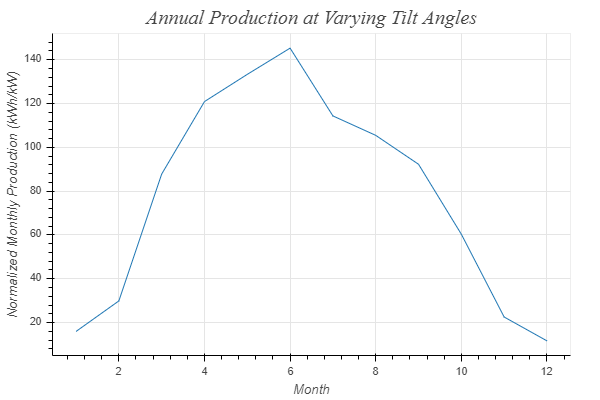

Above is a pre-generated graphic that lacks interactivity, but it should give you an idea of what output you should see for this function call. The one difference is that there should be a dropdown menu that exists below the graphic that allows for a user to adjust the tilt angle of their simulated system.

***

### Annual Tilt Angle Installation Production Plot Generation

The next function generates an image that shows the annual production of an installation at different tilts using both TMY2 and TMY3 weather data. To call it, as with the previous function, we need to pass a dataframe. The function also will walk through every location that is passed, and generate a unique graphic for each location, so we will again be using our downsampled dataframe. 

In [4]:
bokeh_plotting_interface.annual_tilt_angle_plot_generation(downsampled_dataframe)

Data for Anchorage is being calculated


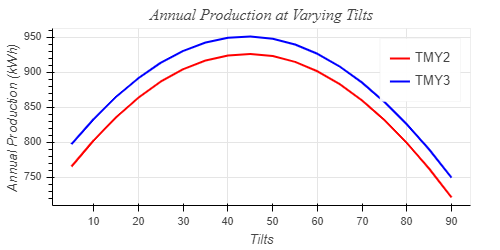

Again, the pre-generated graphic is displayed above. It lacks interactivity, but does provide an accurate representation of what you should expect to see when you run this function.

***

### Annual Production Loss with Varying Tilt Angles

The final PVWatts graphic simulation shows the effect of having a suboptimal tilt angle. The function calculates what the ideal tilt angle is to produce the maximum annual production, and then reports all other tilt angles as a value that is expressed as a percentage difference from the ideal value. Again, this function walks through all elements in a passed dataframe, so we will use our downsampled dataframe.

In [5]:
bokeh_plotting_interface.annual_production_loss_plot_generation(downsampled_dataframe)

Data for Anchorage is being calculated


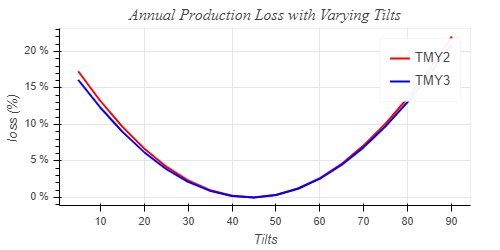

This above graphic shows the intended output of this function call. While for this specific location TMY2 and TMY3 don't simulate wildly different loss percentages, for other locations it is a significant difference.

***

#### Thank you for taking the time to go through our bokeh plotting interface demonstration notebook. We hope that you found it valuable, and instructive.
-- The ARCTIC Dev Team